# NLP Application with ML

## Classification of Tweets Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("airline_tweets.csv")
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [3]:
#!pip install matplotlib==3.4

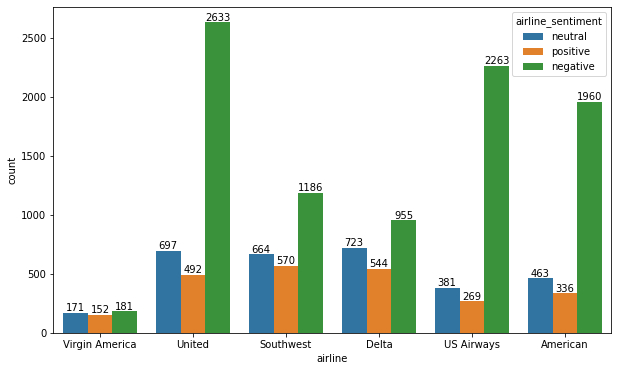

In [4]:
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment")
for p in ax.containers:
    ax.bar_label(p)

In [5]:
import plotly.express as px
fig = px.bar(df, x ="airline", color = "airline_sentiment")
fig.show()

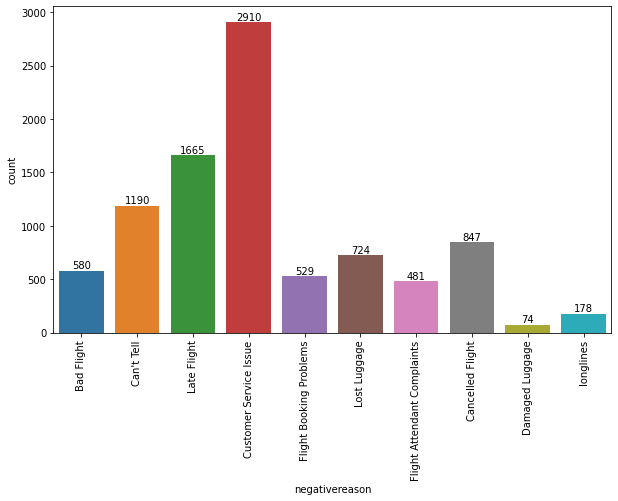

In [6]:
ax = sns.countplot(data =df, x ="negativereason")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);


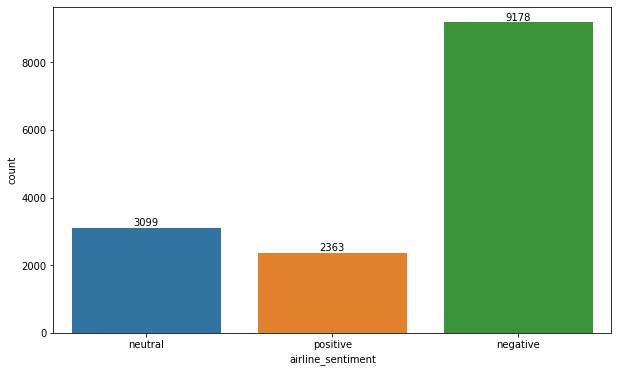

In [7]:
ax = sns.countplot(data =df, x = "airline_sentiment")
ax.bar_label(ax.containers[0]);

In [8]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Cleaning Data

In [9]:
df2 = df.copy()

In [10]:
df2["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

## Cleaning Data

In [11]:
import re
s = "http\\:www.mynet.com #lateflight @airlines"
s = re.sub("http\S+", "", s).strip()
# \s --> bosluk haric tum karakterler, http ile baslayip bosluk gorene kadar tamamen silecek
# textlerin basinda sonundaki bosluklari silmek icin, once ve sonraki bosluklari silmeyi unutma! 

s

'#lateflight @airlines'

In [12]:
s = re.sub("#\S+", "", s)
s
# hashtag ile baslayan-bosluga kadar olan tum karakterleri sil

' @airlines'

In [13]:
s = re.sub("@\S+", "", s)
s.strip()

''

In [14]:
#nltk.download('stopwords')

In [15]:
#nltk.download('wordnet')
#nltk.download('punkt')

In [16]:
# negative_auxiliary_verbs = ["no", 'not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't",'didn', "didn't", 'doesn',
#                             "doesn't", "don't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
#                             'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',"needn't", 'shan', "shan't", 'shouldn',
#                             "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', ,"won't", 'wouldn', "wouldn't"]

In [17]:
#  code 15: 
# stop_words = stopwords.words('english')

# for i in negative_auxiliary_verbs:
#         stop_words.remove(i) 

In [18]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [19]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [
        WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw
    ]

    #joining
    return " ".join(text_cleaned)

In [20]:
cleaning_text = df2["text"].apply(cleaning)
cleaning_text.head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Features and Label

In [21]:
df2 = df2[["airline_sentiment", "text"]]
df2.head()

airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df2["text"]
y = df2["airline_sentiment"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.1 bile yapabiliriz
                                                    # train datamin olabildigince buyuk olmasi lazim 
                                                    stratify=y,
                                                    random_state=101)

In [25]:
X_train # temizleme islemini henuz yapmadik

12713    @AmericanAir thanks to your attendant on fligh...
9305     Great management of @USAirways twitter account...
9726     @USAirways @PHLAirport always nice when a cust...
4751     @SouthwestAir bag in possession but no clothes...
14102    @AmericanAir You have the worst customer servi...
                               ...                        
6570     @SouthwestAir used to love you, but you keep r...
880          @united like continental's chicken feat fairs
10563    Hey @USAirways based on the number of retweets...
3924     @united The link in the message I was replying...
11333    @USAirways you run a piece of shit airline!!  ...
Name: text, Length: 11712, dtype: object

## Vectorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vectorizer = CountVectorizer(preprocessor=cleaning, # yukarida tanimladigimiz fonksiyonu yazdik 
                             # sayisal forma donustururken, ayni zamanda yukarda tanimlanan temizligi yapiyor
                            min_df=3)  # 3 veya daha az gecen tokenleri ignore et. 
                            #     ngram_range=(1,2) --> 
                            #     max_features= 1500 --> 1500'den fazla gecen tokeni ignore et (onerilmez)
                             
# train setindeki uniqe tokenlerle model belirlendigi icin, testte bazen istenilen verim alanamayabilir

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

---
ngram_range=(1,2) 
- Ahmet telefonu cok begendi
- 4 tokenim ngram_range=2  ile 3'e dustu , (1,2) denilirse hem tek tek hem ikili gruplarla inceler 
- max (1,3) olabilir onda da feature sayisi ve maliyet cok artar
- ikiserli gruplara ayrilarak kelime gruplarini yakalamak icin 
- 
- ngram kullanmanin sonuca cok buyuk etkisi var ise, datanin kucuk oldugunu gosterir 
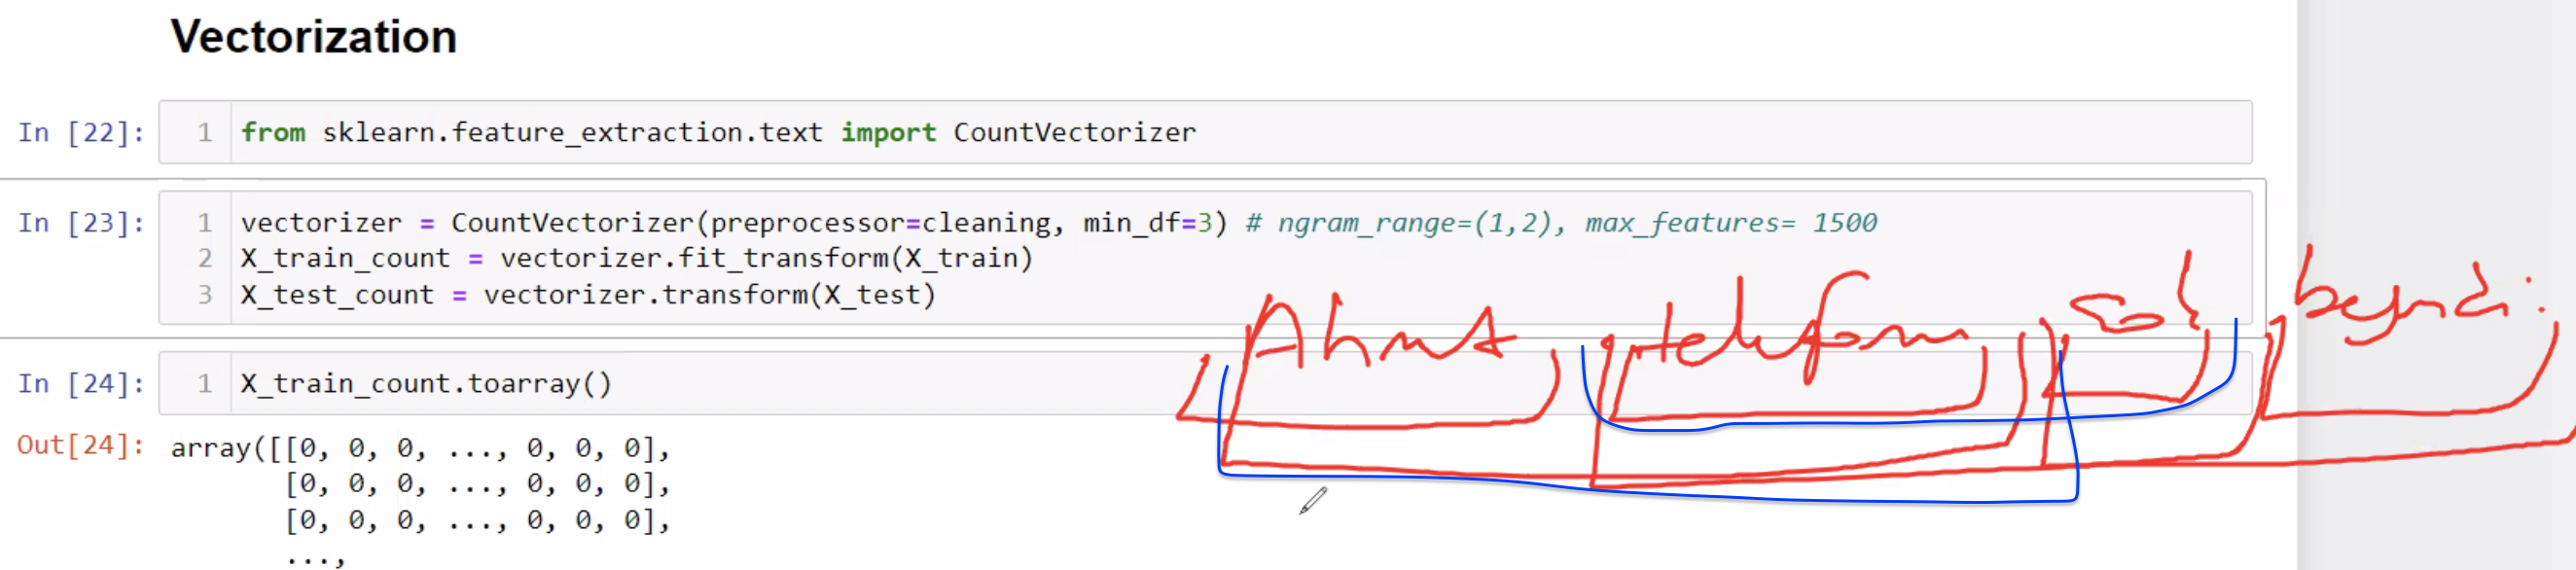

---

In [28]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [29]:
pd.DataFrame(X_train_count.toarray(),
             columns=vectorizer.get_feature_names_out())
#  3126 columns, feature olustu
# eger  min_df=3 kaldirsaydik  7757 columns olurdu 

aa  aadvantage  abc  ability  able  aboard  abq  absolute  absolutely  \
0       0           0    0        0     0       0    0         0           0   
1       0           0    0        0     0       0    0         0           0   
2       0           0    0        0     0       0    0         0           0   
3       0           0    0        0     0       0    0         0           0   
4       0           0    0        0     0       0    0         0           0   
...    ..         ...  ...      ...   ...     ...  ...       ...         ...   
11707   0           0    0        0     0       0    0         0           0   
11708   0           0    0        0     0       0    0         0           0   
11709   0           0    0        0     0       0    0         0           0   
11710   0           0    0        0     0       0    0         0           0   
11711   1           0    0        0     0       0    0         0           0   

       absurd  abt  abysmal  ac  accept  acceptable  accepted  accepting  \
0           0    0        0   0       0           0         0          0   
1           0    0        0   0       0           0         0          0   
2           0    0        0   0       0           0         0          0   
3           0    0        0   0       0           0         0          0   
4           0    0        0   0       0           0         0          0   
...       ...  ...      ...  ..     ...         ...       ...        ...   
11707       0    0        0   0       0           0         0          0   
11708       0    0        0   0       0           0         0          0   
11709       0    0        0   0       0           0         0          0   
11710       0    0        0   0       0           0         0          0   
11711       0    0        0   0       0           0         0          0   

       access  accident  accommodate  accommodating  accommodation  \
0           0         0            0              0              0   
1           0         0            0              0              0   
2           0         0            0              0              0   
3           0         0            0              0              0   
4           0         0            0              0              0   
...       ...       ...          ...            ...            ...   
11707       0         0            0              0              0   
11708       0         0            0              0              0   
11709       0         0            0              0              0   
11710       0         0            0              0              0   
11711       0         0            0              0              0   

       accomplished  according  accordingly  ...  yea  yeah  year  yell  \
0                 0          0            0  ...    0     0     0     0   
1                 0          0            0  ...    0     0     0     0   
2                 0          0            0  ...    0     0     0     0   
3                 0          0            0  ...    0     0     0     0   
4                 0          0            0  ...    0     0     0     0   
...             ...        ...          ...  ...  ...   ...   ...   ...   
11707             0          0            0  ...    0     0     0     0   
11708             0          0            0  ...    0     0     0     0   
11709             0          0            0  ...    0     0     0     0   
11710             0          0            0  ...    0     0     0     0   
11711             0          0            0  ...    0     0     0     0   

       yelled  yelling  yep  yes  yest  yesterday  yet  yo  york  youd  youll  \
0           0        0    0    0     0          0    0   0     0     0      0   
1           0        0    0    0     0          0    0   0     0     0      0   
2           0        0    0    0     0          0    0   0     0     0      0   
3           0        0    0    0     0          0    0   0     0   

## Model Comparisons - Vectorization

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [31]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))

## Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB  # BernoulliNB for binary model

In [33]:
nb = MultinomialNB(alpha=10) # default alpha=1.0
# alpha--> yumusatma parametresi 
# alpha Overfitting'i gidermek icin kullanilan tek parametre (scorelari iyilestirmez)
# alpha olabildigince kucuk olmali, diger labellerimde skorelari bozabilir

nb.fit(X_train_count, y_train)

MultinomialNB(alpha=10)

alpha, bayes kullanimi
- sifir olarak gecen her bir tokene, corpus'a gore, belli bir oranda olasilik tahsis ediyor 
- alpha normalde 1.0, alpha buyudukce veya kuculdukce sifirlar sonsuz degere ulasabiliyor 
- farkli degerler vererek overfitting gidermeye calisiyoruz 
- **Overfitting**'i gidermek icin kullanilan tek parametre **(scorelari iyilestirmez)**
- alpha olabildigince kucuk olmali, diger labellerimde skorelari bozabilir
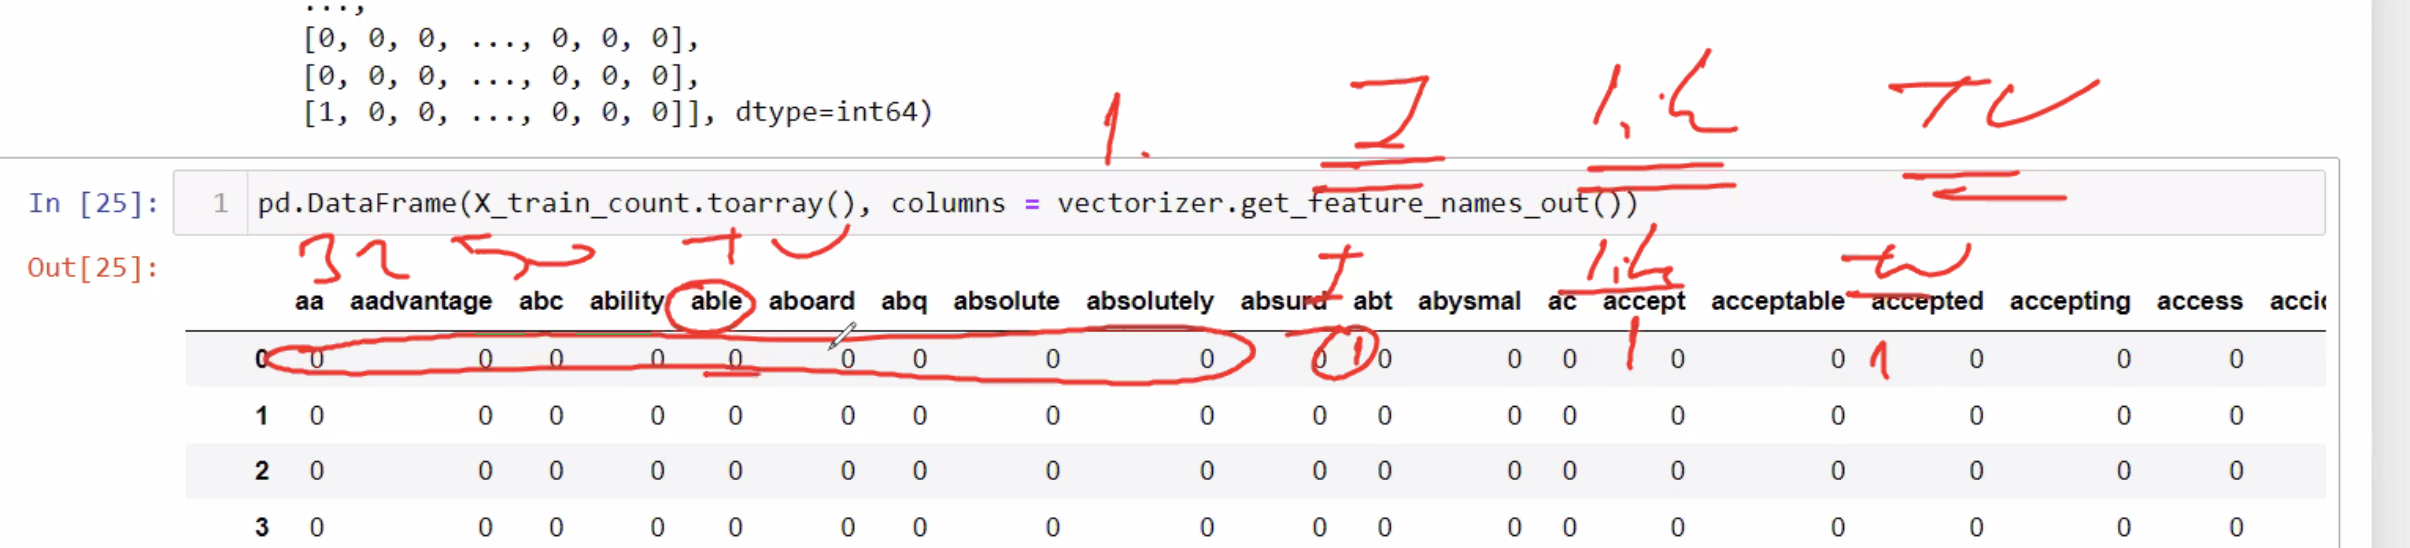

---
---

In [34]:
print("NB MODEL") # MultinomialNB, BernoulliNB ikisini de deneyip hangisi iyi sonuc veriyorsa onunla ilerleyelim

eval(nb, X_train_count, X_test_count)

NB MODEL
[[1793   27   15]
 [ 467  129   24]
 [ 251   16  206]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.83      1835
     neutral       0.75      0.21      0.33       620
    positive       0.84      0.44      0.57       473

    accuracy                           0.73      2928
   macro avg       0.77      0.54      0.57      2928
weighted avg       0.74      0.73      0.68      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      7343
     neutral       0.80      0.25      0.38      2479
    positive       0.86      0.44      0.58      1890

    accuracy                           0.74     11712
   macro avg       0.79      0.56      0.60     11712
weighted avg       0.76      0.74      0.70     11712



---

hedef label ne ise onun skorelari uzerinden overfitting degerlendirmesi yapariz 
- burada hedef negatif 
- recall olabildigince yuksek (1. hedef)
- precision da olabildigince yuksek  (2. hedef)
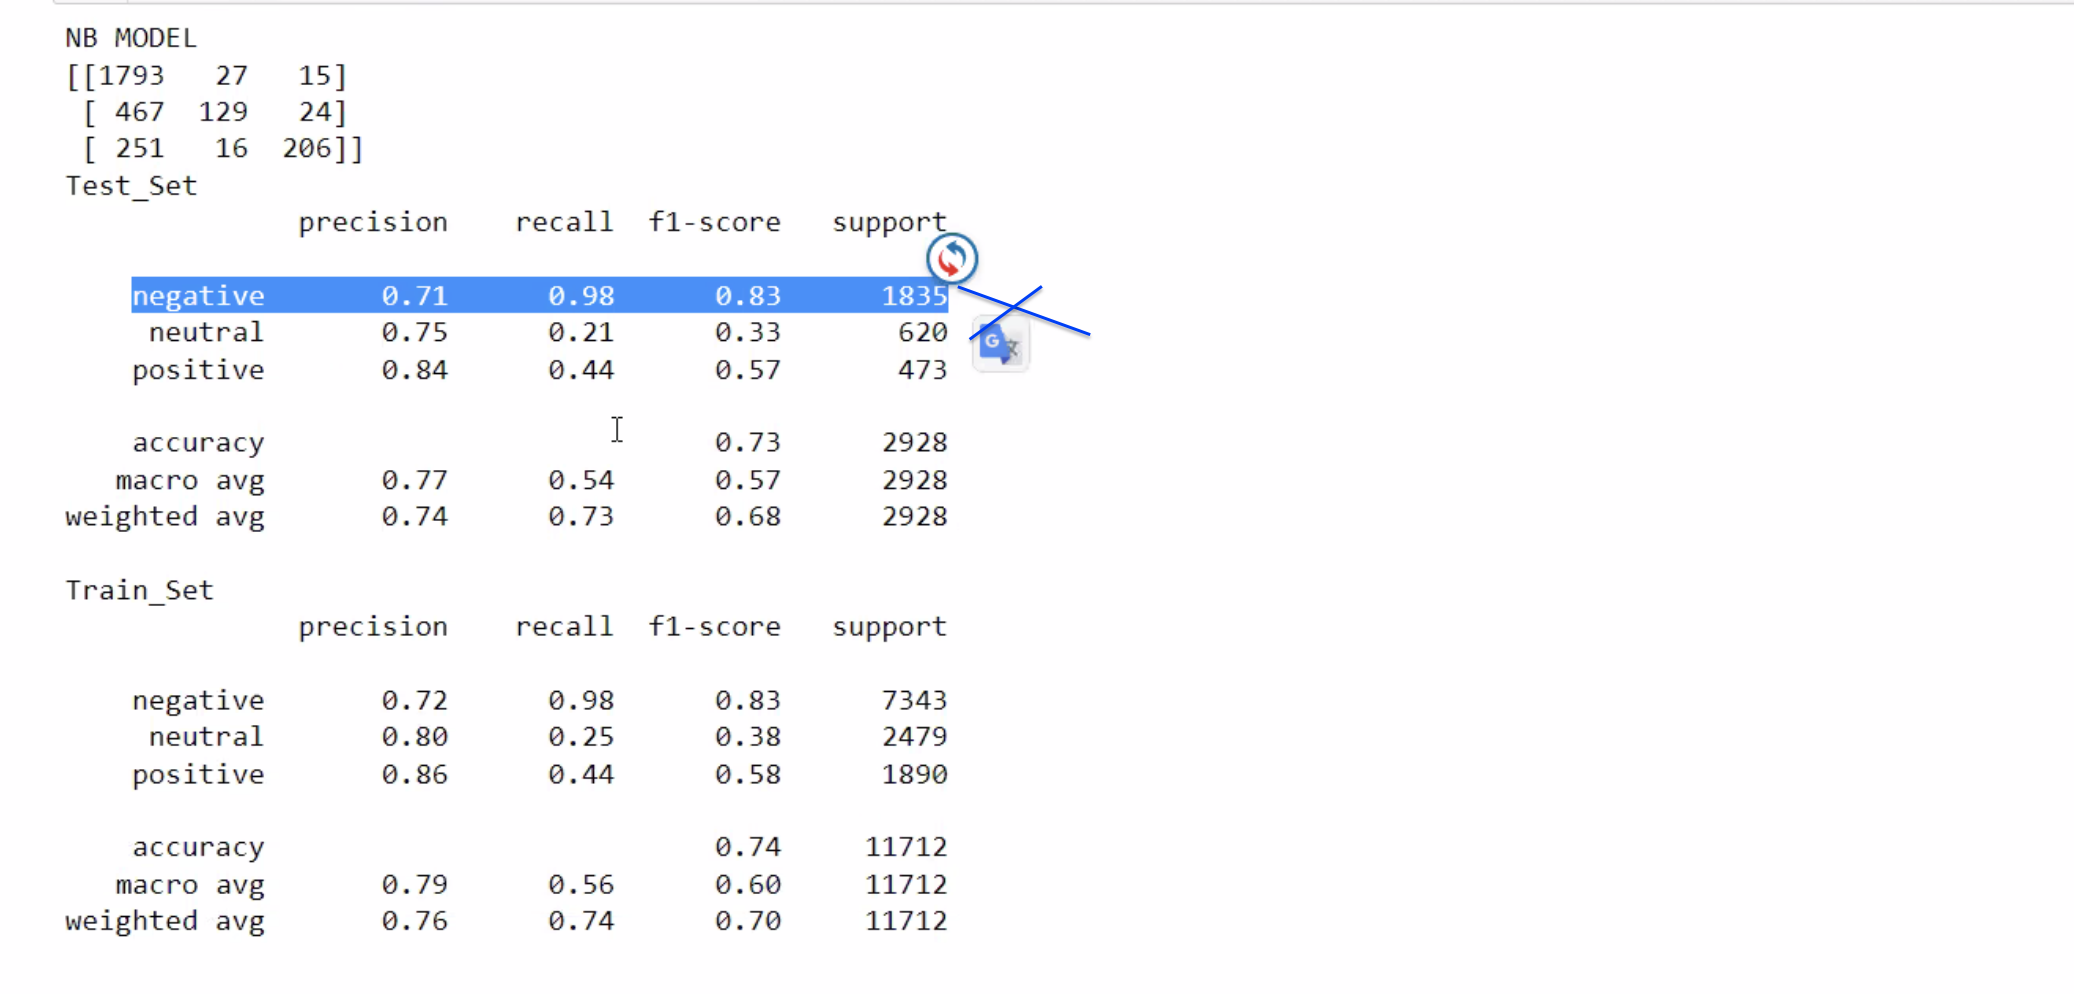
---
sample: 
- precision 0.2 olsaydi, 1000 kiside 500 kisi hasta ( 100/x = 0.2)
- precision 0.3 olsaydi, 1000 kiside 333 kisi hasta diyerek, 333 icince kanserli hastalari arardim. 

---
- multiclasslarda recall,precision kullanamiyorum
- tek bir labelin degerini gormek istiyorsam **make_scorer** kullanirim

---
Asagidaki scoring incelemesi: 
- precision_score() icerisindeki functionlari kullanabilirim
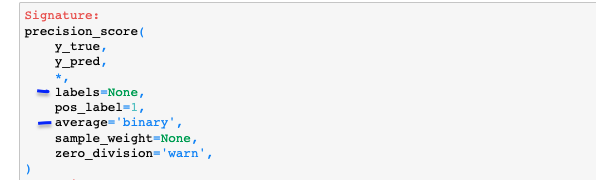

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score), # icine ilave parametre olabilir
           # skore func icinde gecen functionlari ilave edebilirim (yukaridaki aciklama)
           
           'precision-neg': make_scorer(precision_score,
                                        average=None, # macro,micro vb olabilir
                                        labels=["negative"]), 
                                       # tek bir lebel oldugu icin average yazmam lazim 
           
           'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
           'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

model = MultinomialNB(alpha=10) #model belirlerken verdigin alpha ile ayni olsun

scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores,
                         index = range(1, 11))

df_scores.mean()[2:]
# skorelarin tutarli olup olmadigina bakariz
#               precision    recall  f1-score   support
#  negative       0.71      0.98      0.83      1835

test_accuracy         0.714482
test_precision-neg    0.704816
test_recall-neg       0.978891
test_f1-neg           0.819534
dtype: float64

In [36]:
df_scores # normalde 0dan baslar, ama ben ozellikle 2'den baslamasini istiyorum

fit_time  score_time  test_accuracy  test_precision-neg  test_recall-neg  \
1   0.022928    0.013345       0.702218            0.694231         0.982313   
2   0.020807    0.013544       0.718430            0.705479         0.980952   
3   0.020871    0.013173       0.714774            0.705015         0.975510   
4   0.021212    0.012836       0.708796            0.701463         0.979564   
5   0.020949    0.015218       0.709650            0.702148         0.979564   
6   0.023346    0.016732       0.709650            0.700587         0.975477   
7   0.024370    0.014902       0.718190            0.710474         0.979564   
8   0.024880    0.013957       0.710504            0.703448         0.972752   
9   0.023751    0.014824       0.729291            0.713722         0.985014   
10  0.023629    0.014731       0.723313            0.711596         0.978202   

    test_f1-neg  
1      0.813521  
2      0.820717  
3      0.818493  
4      0.817510  
5      0.817975  
6      0.815490  
7      0.823597  
8      0.816467  
9      0.827705  
10     0.823867

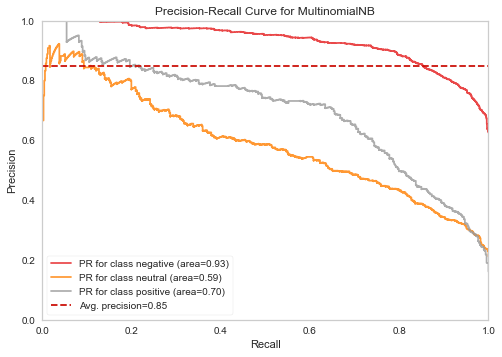

In [37]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    classes=nb.classes_, # class isimlerini yazdirmasi icin ekliyoruz 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [38]:
y_pred = nb.predict(X_test_count)

nb_count_rec_neg = recall_score(y_test,
                                y_pred,
                                labels=["negative"], 
                                # multiclass oldugu icin label ve average belirtmeliyim
                                average=None)

nb_count_f1_neg = f1_score(y_test,
                           y_pred,
                           labels=["negative"],
                           # multiclass oldugu icin label ve average belirtmeliyim
                           average=None)


nb_AP_neg = viz.score_["negative"]  # sadece

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.02, # overfittingi giderir (default C=1.0)
                         # ne kadar kucuk olursa, uyguladigi regresyon katsayisi o kadar buyuk olur 
                         
                         max_iter=1000)  # max_iter ile ilgili hata alirsan bu degeri arttir
                        #class_weight='balanced' # notr ve pozitif onemsiz oldugu icin kullanmadik
                        # sadece neg label kullandigimiz icin burada ihtiyac yok


log.fit(X_train_count, y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [40]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1759   40   36]
 [ 366  211   43]
 [ 177   47  249]]
Test_Set
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      1835
     neutral       0.71      0.34      0.46       620
    positive       0.76      0.53      0.62       473

    accuracy                           0.76      2928
   macro avg       0.74      0.61      0.64      2928
weighted avg       0.75      0.76      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.77      0.97      0.86      7343
     neutral       0.76      0.41      0.53      2479
    positive       0.79      0.51      0.62      1890

    accuracy                           0.77     11712
   macro avg       0.77      0.63      0.67     11712
weighted avg       0.77      0.77      0.75     11712



In [41]:
model = LogisticRegression(C=0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.745731
test_precision-neg    0.747621
test_recall-neg       0.963501
test_f1-neg           0.841924
dtype: float64

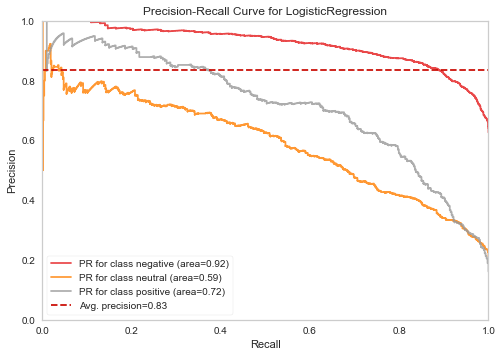

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [42]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.02, max_iter=1000),
                           classes=log.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [43]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)
log_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
log_AP_neg = viz.score_["negative"]

In [44]:
log = LogisticRegression(C=0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count, y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [45]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[1302  435   98]
 [  98  447   75]
 [  34   96  343]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.71      0.80      1835
     neutral       0.46      0.72      0.56       620
    positive       0.66      0.73      0.69       473

    accuracy                           0.71      2928
   macro avg       0.68      0.72      0.68      2928
weighted avg       0.77      0.71      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.74      0.82      7343
     neutral       0.51      0.78      0.62      2479
    positive       0.67      0.75      0.71      1890

    accuracy                           0.75     11712
   macro avg       0.70      0.75      0.72     11712
weighted avg       0.80      0.75      0.76     11712



## SVM

In [46]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01) # deneme-yanilma c degeri ile oynayarak overfitting gideririz 
svc.fit(X_train_count, y_train)

LinearSVC(C=0.01)

In [47]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)
# overfittingi sadece neg label degerlerine bakarak degerlendiriyoruz

SVC MODEL
[[1711   80   44]
 [ 291  279   50]
 [ 124   50  299]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1835
     neutral       0.68      0.45      0.54       620
    positive       0.76      0.63      0.69       473

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      7343
     neutral       0.76      0.55      0.64      2479
    positive       0.80      0.63      0.70      1890

    accuracy                           0.82     11712
   macro avg       0.80      0.71      0.74     11712
weighted avg       0.81      0.82      0.81     11712



In [48]:
model = LinearSVC(C=0.01)

scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]
# degerler tutarli
#              precision    recall  f1-score   support
# negative       0.80      0.93      0.86      1835

test_accuracy         0.777494
test_precision-neg    0.799702
test_recall-neg       0.939396
test_f1-neg           0.863922
dtype: float64

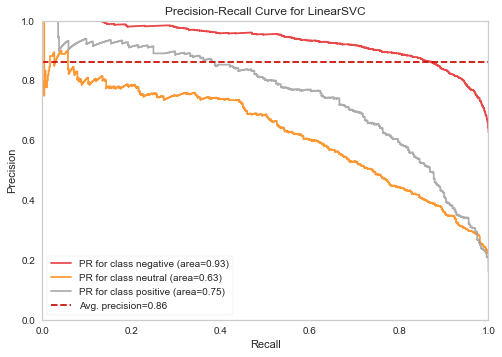

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [49]:
viz = PrecisionRecallCurve(LinearSVC(C=0.01),
                           classes=svc.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [50]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)

svc_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)

svc_AP_neg = viz.score_["negative"]

## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count, y_train)

KNeighborsClassifier(n_neighbors=7)

In [52]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[912 839  84]
 [113 447  60]
 [ 46 178 249]]
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.50      0.63      1835
     neutral       0.31      0.72      0.43       620
    positive       0.63      0.53      0.58       473

    accuracy                           0.55      2928
   macro avg       0.60      0.58      0.54      2928
weighted avg       0.70      0.55      0.58      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.90      0.62      0.73      7343
     neutral       0.39      0.82      0.53      2479
    positive       0.70      0.56      0.62      1890

    accuracy                           0.65     11712
   macro avg       0.66      0.66      0.63     11712
weighted avg       0.76      0.65      0.67     11712



In [53]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.530654
test_precision-neg    0.846802
test_recall-neg       0.466436
test_f1-neg           0.601124
dtype: float64

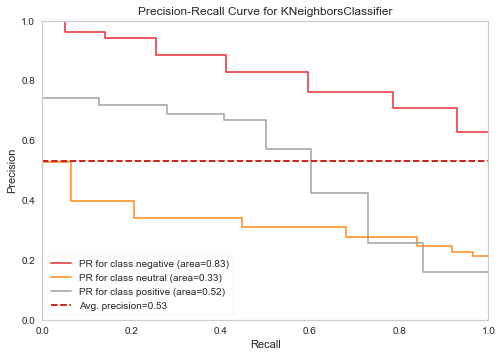

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [54]:
viz = PrecisionRecallCurve(KNeighborsClassifier(n_neighbors=7),
                           classes=knn.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [55]:
y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
knn_AP_neg = viz.score_["negative"]

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100,
                            max_depth=40, # OVERFITTINGE EN BUYUK MUDAHELE 
                            random_state=42,
                            n_jobs=-1)  # class_weight="balanced"

rf.fit(X_train_count, y_train)
# vakit kisitliysa bagging, boosting modellerinde max_dept ile oynayarak overfitting giderebiliriz

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [57]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1798   11   26]
 [ 523   59   38]
 [ 219    7  247]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      1835
     neutral       0.77      0.10      0.17       620
    positive       0.79      0.52      0.63       473

    accuracy                           0.72      2928
   macro avg       0.76      0.53      0.54      2928
weighted avg       0.73      0.72      0.65      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.74      1.00      0.85      7343
     neutral       0.97      0.20      0.34      2479
    positive       0.92      0.63      0.75      1890

    accuracy                           0.77     11712
   macro avg       0.88      0.61      0.64     11712
weighted avg       0.82      0.77      0.72     11712



In [58]:
model = RandomForestClassifier(100, max_depth=40, random_state=42, n_jobs=-1)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.710040
test_precision-neg    0.698911
test_recall-neg       0.984338
test_f1-neg           0.817418
dtype: float64

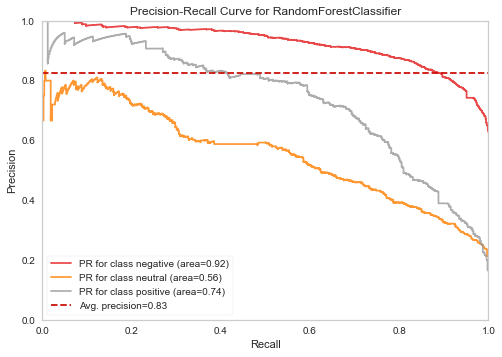

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [59]:
viz = PrecisionRecallCurve(RandomForestClassifier(100,
                                                  max_depth=40,
                                                  random_state=42,
                                                  n_jobs=-1),
                           classes=rf.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [60]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test,
                                y_pred,
                                labels=["negative"],
                                average=None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
rf_AP_neg = viz.score_["negative"]

In [61]:
rf = RandomForestClassifier(100,
                            max_depth=40,
                            random_state=42,
                            n_jobs=-1,
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [62]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

RF MODEL BALANCED
[[1455  305   75]
 [ 152  403   65]
 [  53   97  323]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.79      0.83      1835
     neutral       0.50      0.65      0.57       620
    positive       0.70      0.68      0.69       473

    accuracy                           0.74      2928
   macro avg       0.69      0.71      0.70      2928
weighted avg       0.77      0.74      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.97      0.85      0.91      7343
     neutral       0.64      0.90      0.75      2479
    positive       0.87      0.82      0.85      1890

    accuracy                           0.86     11712
   macro avg       0.83      0.86      0.83     11712
weighted avg       0.89      0.86      0.86     11712



## Ada Boost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=500, random_state=42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [64]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1555  205   75]
 [ 210  339   71]
 [  86   72  315]]
Test_Set
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84      1835
     neutral       0.55      0.55      0.55       620
    positive       0.68      0.67      0.67       473

    accuracy                           0.75      2928
   macro avg       0.69      0.69      0.69      2928
weighted avg       0.75      0.75      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.87      0.88      0.87      7343
     neutral       0.61      0.62      0.62      2479
    positive       0.79      0.71      0.75      1890

    accuracy                           0.80     11712
   macro avg       0.75      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



In [65]:
model = AdaBoostClassifier(n_estimators=500, random_state=42)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.759136
test_precision-neg    0.842861
test_recall-neg       0.856597
test_f1-neg           0.849649
dtype: float64

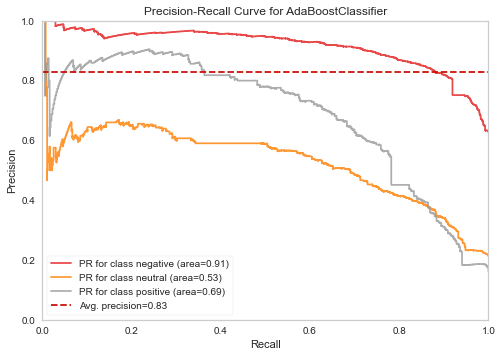

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [66]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators=500,
                                              random_state=42),
                           classes=ada.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [67]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
ada_AP_neg = viz.score_["negative"]

## TF-IDF

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [70]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32545156, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [71]:
pd.DataFrame(X_train_tf_idf.toarray(),
             columns=tf_idf_vectorizer.get_feature_names_out())

aa  aadvantage  abc  ability  able  aboard  abq  absolute  \
0      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
1      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
2      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
3      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
4      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
...         ...         ...  ...      ...   ...     ...  ...       ...   
11707  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11708  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11709  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11710  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11711  0.325452         0.0  0.0      0.0   0.0     0.0  0.0       0.0   

       absolutely  absurd  abt  abysmal   ac  accept  acceptable  accepted  \
0             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
1             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
2             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
3             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
4             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
...           ...     ...  ...      ...  ...     ...         ...       ...   
11707         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11708         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11709         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11710         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11711         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   

       accepting  access  accident  accommodate  accommodating  accommodation  \
0            0.0     0.0       0.0          0.0            0.0            0.0   
1            0.0     0.0       0.0          0.0            0.0            0.0   
2            0.0     0.0       0.0          0.0            0.0            0.0   
3            0.0     0.0       0.0          0.0            0.0            0.0   
4            0.0     0.0       0.0          0.0            0.0            0.0   
...          ...     ...       ...          ...            ...            ...   
11707        0.0     0.0       0.0          0.0            0.0            0.0   
11708        0.0     0.0       0.0          0.0            0.0            0.0   
11709        0.0     0.0       0.0          0.0            0.0            0.0   
11710        0.0     0.0       0.0          0.0            0.0            0.0   
11711        0.0     0.0       0.0          0.0            0.0            0.0   

       accomplished  according  accordingly  ...  yea  yeah  year  yell  \
0               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
1               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
2               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
3               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
4               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
...             ...        ...          ...  ...  ...   ...   ...   ...   
11707           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
11708           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
11709           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
11710           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
11711           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   

       yelled  yelling  yep  yes  yest  yesterday  yet   yo  york  youd  \
0         0.0      0.0  0.0  0.0   0.0        0.0  0.0  0.0   0.0   0.0   
1         0.0      0.0  0.0  0.0   0.0        0.0  0.0  0.0   0.0   0.0   
2         0.0      0.0  0.0  0.0   0.0        0.0  0.0  0.0   0.0   0.0   
3         0.0

## Model Comparisons  TF-IDF

## Naive Bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

In [73]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1802   25    8]
 [ 426  172   22]
 [ 248   31  194]]
Test_Set
              precision    recall  f1-score   support

    negative       0.73      0.98      0.84      1835
     neutral       0.75      0.28      0.41       620
    positive       0.87      0.41      0.56       473

    accuracy                           0.74      2928
   macro avg       0.78      0.56      0.60      2928
weighted avg       0.76      0.74      0.70      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.99      0.85      7343
     neutral       0.84      0.35      0.50      2479
    positive       0.91      0.51      0.65      1890

    accuracy                           0.78     11712
   macro avg       0.84      0.62      0.67     11712
weighted avg       0.80      0.78      0.75     11712



In [74]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.731643
test_precision-neg    0.721593
test_recall-neg       0.978890
test_f1-neg           0.830756
dtype: float64

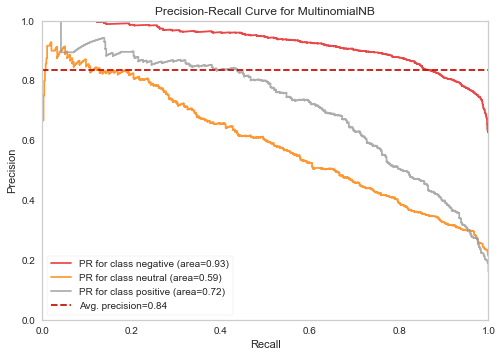

<AxesSubplot:title={'center':'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [75]:
viz = PrecisionRecallCurve(MultinomialNB(),
                           classes=nb.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [76]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test,
                                y_pred,
                                labels=["negative"],
                                average=None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
nb_tfidf_AP_neg = viz.score_["negative"]

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.4,
                         max_iter=1000)

log.fit(X_train_tf_idf, y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [78]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1757   51   27]
 [ 332  256   32]
 [ 144   47  282]]
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.96      0.86      1835
     neutral       0.72      0.41      0.53       620
    positive       0.83      0.60      0.69       473

    accuracy                           0.78      2928
   macro avg       0.78      0.66      0.69      2928
weighted avg       0.78      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.82      0.97      0.89      7343
     neutral       0.82      0.53      0.64      2479
    positive       0.87      0.62      0.73      1890

    accuracy                           0.82     11712
   macro avg       0.84      0.71      0.75     11712
weighted avg       0.83      0.82      0.81     11712



In [79]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.771432
test_precision-neg    0.776135
test_recall-neg       0.960506
test_f1-neg           0.858515
dtype: float64

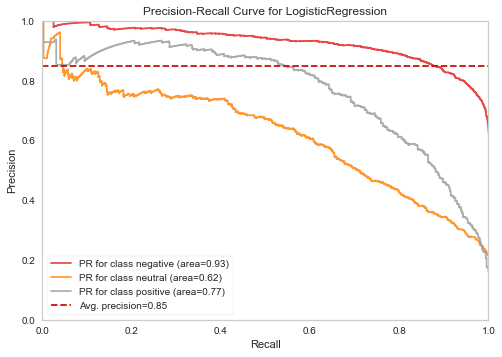

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [80]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.4, max_iter=1000),
                           classes=log.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [81]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)

log_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
log_tfidf_AP_neg = viz.score_["negative"]

In [82]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf, y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [83]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[1432  304   99]
 [ 121  427   72]
 [  39   71  363]]
Test_Set
              precision    recall  f1-score   support

    negative       0.90      0.78      0.84      1835
     neutral       0.53      0.69      0.60       620
    positive       0.68      0.77      0.72       473

    accuracy                           0.76      2928
   macro avg       0.70      0.75      0.72      2928
weighted avg       0.79      0.76      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      7343
     neutral       0.61      0.80      0.69      2479
    positive       0.74      0.84      0.79      1890

    accuracy                           0.81     11712
   macro avg       0.76      0.82      0.78     11712
weighted avg       0.84      0.81      0.82     11712



## SVM

In [84]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.1)

In [85]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1737   64   34]
 [ 312  263   45]
 [ 124   44  305]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      1835
     neutral       0.71      0.42      0.53       620
    positive       0.79      0.64      0.71       473

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.84      0.97      0.90      7343
     neutral       0.83      0.56      0.67      2479
    positive       0.87      0.68      0.76      1890

    accuracy                           0.84     11712
   macro avg       0.84      0.74      0.78     11712
weighted avg       0.84      0.84      0.83     11712



In [86]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.781934
test_precision-neg    0.790352
test_recall-neg       0.956965
test_f1-neg           0.865677
dtype: float64

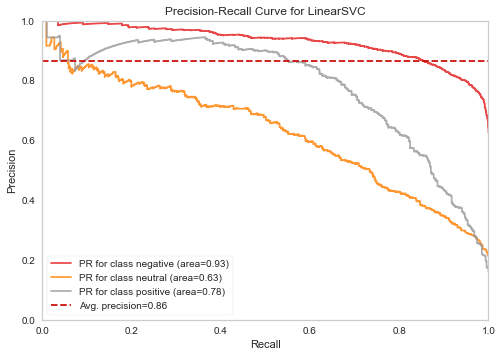

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [87]:
viz = PrecisionRecallCurve(LinearSVC(C=0.1),
                           classes=svc.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [88]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)

svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
svc_tfidf_AP_neg = viz.score_["negative"]

## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tf_idf, y_train)

KNeighborsClassifier(n_neighbors=7)

In [90]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

KNN MODEL
[[ 259 1563   13]
 [  57  549   14]
 [  42  335   96]]
Test_Set
              precision    recall  f1-score   support

    negative       0.72      0.14      0.24      1835
     neutral       0.22      0.89      0.36       620
    positive       0.78      0.20      0.32       473

    accuracy                           0.31      2928
   macro avg       0.58      0.41      0.31      2928
weighted avg       0.63      0.31      0.28      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.87      0.28      0.43      7343
     neutral       0.26      0.92      0.41      2479
    positive       0.83      0.24      0.37      1890

    accuracy                           0.41     11712
   macro avg       0.65      0.48      0.40     11712
weighted avg       0.73      0.41      0.41     11712



In [91]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.302765
test_precision-neg    0.723823
test_recall-neg       0.139858
test_f1-neg           0.233937
dtype: float64

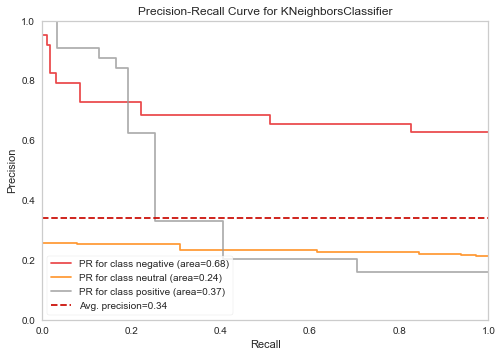

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [92]:
viz = PrecisionRecallCurve(KNeighborsClassifier(n_neighbors=7),
                           classes=knn.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [93]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)

knn_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
knn_tfidf_AP_neg = viz.score_["negative"]

## RandomForest

In [94]:
rf = RandomForestClassifier(100, max_depth=40, random_state=42, n_jobs=-1)
# mox_dept olmasaydi overfitting sonuc cikacakti 
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [95]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1805   10   20]
 [ 532   53   35]
 [ 242    7  224]]
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1835
     neutral       0.76      0.09      0.15       620
    positive       0.80      0.47      0.60       473

    accuracy                           0.71      2928
   macro avg       0.75      0.51      0.52      2928
weighted avg       0.73      0.71      0.64      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.73      1.00      0.84      7343
     neutral       0.98      0.21      0.34      2479
    positive       0.94      0.58      0.72      1890

    accuracy                           0.76     11712
   macro avg       0.88      0.60      0.64     11712
weighted avg       0.82      0.76      0.72     11712



In [96]:
model = RandomForestClassifier(100, max_depth=40, random_state=42, n_jobs=-1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.707565
test_precision-neg    0.694344
test_recall-neg       0.988288
test_f1-neg           0.815631
dtype: float64

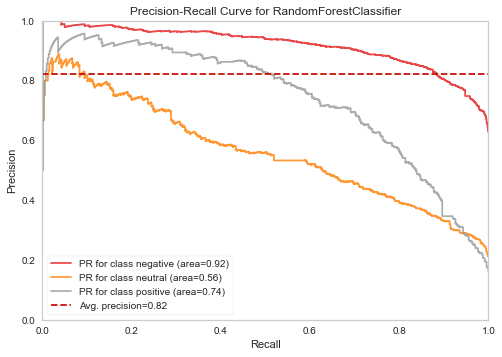

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [97]:
viz = PrecisionRecallCurve(RandomForestClassifier(100,
                                                  max_depth=40,
                                                  random_state=42,
                                                  n_jobs=-1),
                           classes=rf.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [98]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test,
                                y_pred,
                                labels=["negative"],
                                average=None)

rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
rf_tfidf_AP_neg = viz.score_["negative"]

In [99]:
rf = RandomForestClassifier(100,
                            max_depth=15,
                            random_state=42,
                            n_jobs=-1,
                            class_weight="balanced")

rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [100]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL BALANCED
[[1353  386   96]
 [ 129  423   68]
 [  47  108  318]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.74      0.80      1835
     neutral       0.46      0.68      0.55       620
    positive       0.66      0.67      0.67       473

    accuracy                           0.72      2928
   macro avg       0.67      0.70      0.67      2928
weighted avg       0.76      0.72      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.76      0.84      7343
     neutral       0.52      0.81      0.63      2479
    positive       0.74      0.72      0.73      1890

    accuracy                           0.77     11712
   macro avg       0.73      0.76      0.73     11712
weighted avg       0.81      0.77      0.78     11712



## Ada Boost

In [101]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=500, random_state=42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [102]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1536  226   73]
 [ 228  331   61]
 [  98   73  302]]
Test_Set
              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      1835
     neutral       0.53      0.53      0.53       620
    positive       0.69      0.64      0.66       473

    accuracy                           0.74      2928
   macro avg       0.68      0.67      0.68      2928
weighted avg       0.74      0.74      0.74      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      7343
     neutral       0.62      0.62      0.62      2479
    positive       0.83      0.73      0.77      1890

    accuracy                           0.80     11712
   macro avg       0.77      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



In [103]:
model = AdaBoostClassifier(n_estimators=500, random_state=42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.739414
test_precision-neg    0.823474
test_recall-neg       0.842844
test_f1-neg           0.833006
dtype: float64

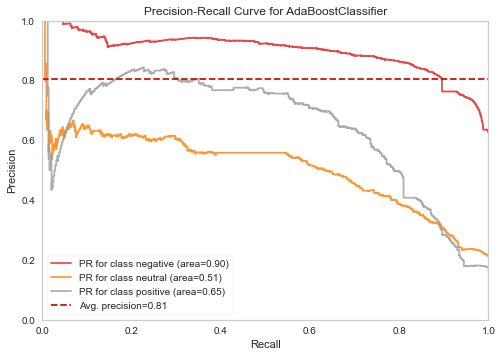

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [104]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators=500,
                                              random_state=42),
                           classes=ada.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [105]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test,
                                 y_pred,
                                 labels=["negative"],
                                 average=None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels=["negative"], average=None)
ada_tfidf_AP_neg = viz.score_["negative"]

## Compare Scoring

In [106]:
nb_count_rec_neg
# array icinde cikmamasi icin asagidaki formulde 
# nb_count_rec_neg[0] seklinde yazdik 

array([0.97711172])

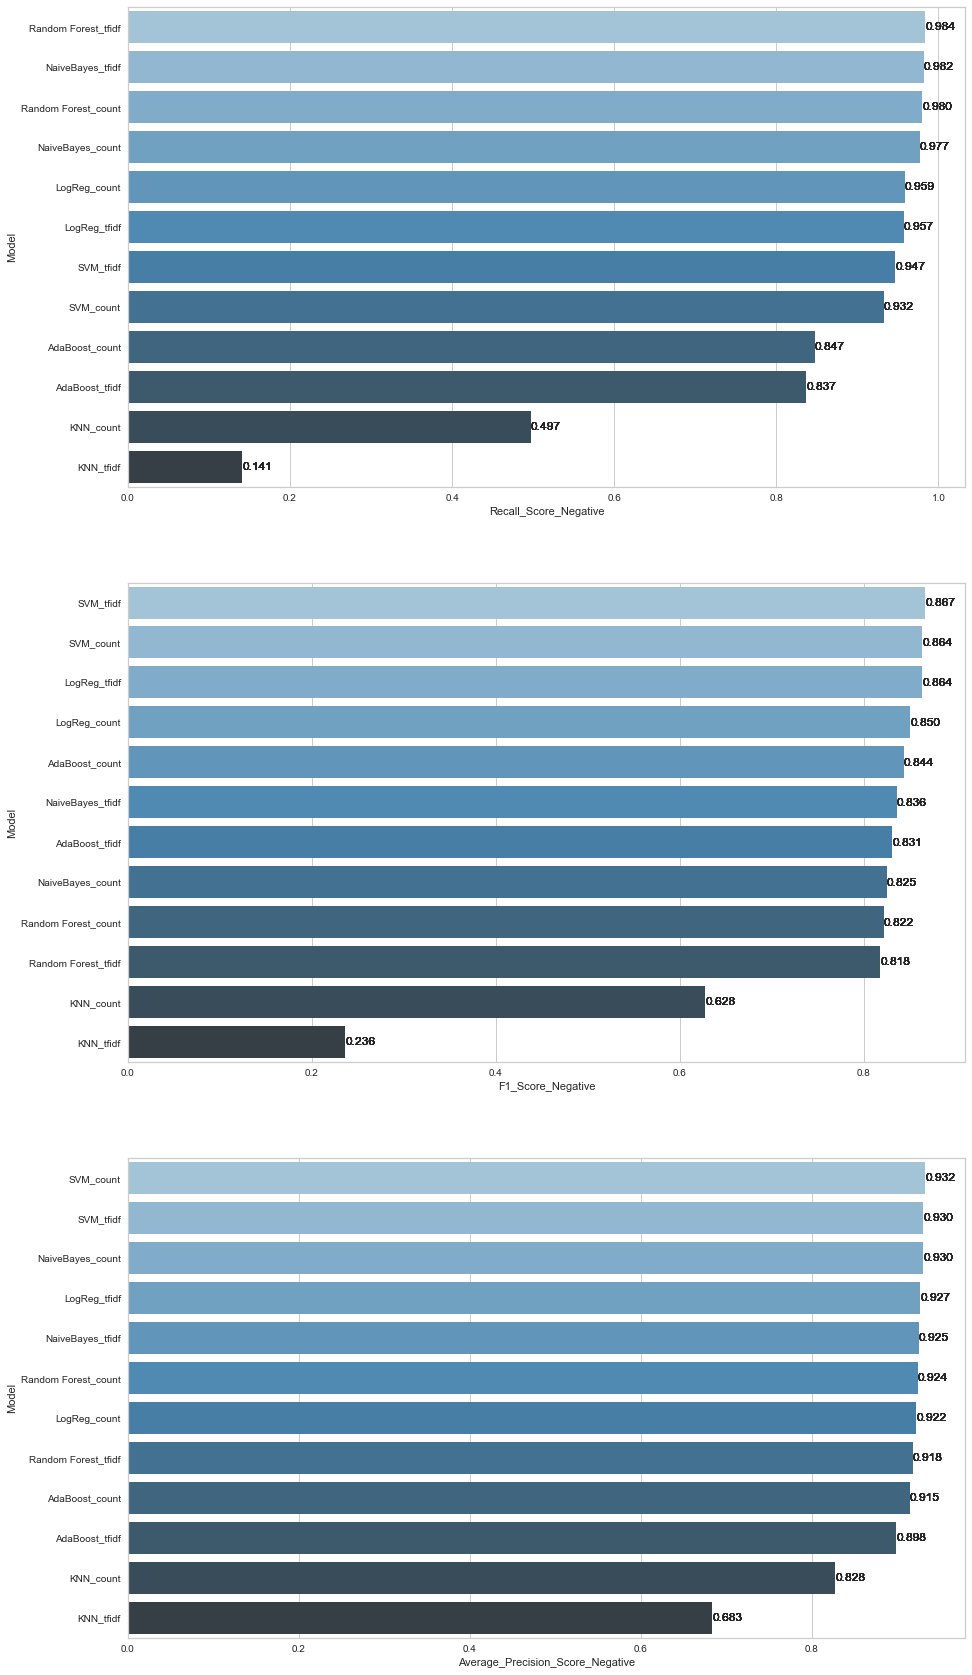

In [107]:
compare = pd.DataFrame({
    "Model": [
        "NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count",
        "Random Forest_count", "AdaBoost_count", "NaiveBayes_tfidf",
        "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", "Random Forest_tfidf",
        "AdaBoost_tfidf"
    ], # tabloda hangi isimlerde gorunmesini istiyorsak onlari verdik
  
    "F1_Score_Negative": [
        nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0],
        knn_count_f1_neg[0], rf_count_f1_neg[0], ada_count_f1_neg[0],
        nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0], svc_tfidf_f1_neg[0],
        knn_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]
    ], # 
    
    
    "Recall_Score_Negative": [
        nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0],
        knn_count_rec_neg[0], rf_count_rec_neg[0], ada_count_rec_neg[0],
        nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0],
        knn_tfidf_rec_neg[0], rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]
    ],
    "Average_Precision_Score_Negative": [
        nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg, ada_AP_neg,
        nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg, knn_tfidf_AP_neg,
        rf_tfidf_AP_neg, ada_tfidf_AP_neg
    ] # bu degerler arry icinde gelmedigi icin [0] yazmaya gerek kalmadi
})

# tanimlamalari yaptiktan sonra plt.subplot(311) 3 satir 1 sutundan olusan tablo 

def labels(ax):

    for p in ax.patches:
        ax.bar_label(ax.containers[0], fmt="%.3f")


plt.figure(figsize=(15, 30))
plt.subplot(311) # 3 satir 1 sutundan olusan tablonun 1.sini ciz
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax = sns.barplot(x="Recall_Score_Negative",
                 y="Model",
                 data=compare,
                 palette="Blues_d")
labels(ax)

plt.subplot(312) # 3 satir 1 sutundan olusan tablonun 2.sini ciz
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax = sns.barplot(x="F1_Score_Negative",
                 y="Model",
                 data=compare,
                 palette="Blues_d")
labels(ax)

plt.subplot(313) # 3 satir 1 sutundan olusan tablonun 3.sini ciz
compare = compare.sort_values(by="Average_Precision_Score_Negative",
                              ascending=False)
ax = sns.barplot(x="Average_Precision_Score_Negative",
                 y="Model",
                 data=compare,
                 palette="Blues_d")
labels(ax)
plt.show()

# precision da onamli ama biz burada inun yerine f1 skore aldik
# f1 yuksekse precision da yuksektir diye dusunerek onu cizdirmedik

## For New Tweets, prediction with pipeline


In [108]:
from sklearn.pipeline import Pipeline
# yapilan islemleri otomize eder 


In [109]:
pipe = Pipeline([('tfidf', TfidfVectorizer(preprocessor=cleaning, min_df=3)),
                 ('log', LogisticRegression(C=0.4, max_iter=1000))])
# tfidf icine yazilacak islemler list icerisinde yazilmali
# siralama onemli
# once fit_transform islemleri yapan transform islemleri, sonra predict algoritmasi yazilir

In [110]:
pipe.fit(X, y)
# egitim tum data ile yapilir 
# cunku data ne kadar buyuk olursa egitim o kadar buyuk olur 

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x7fd6a34a8430>)),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

## Prediction

In [111]:
tweet = "it was not the worst flight i have ever been."
tweet = pd.Series(tweet)
# egitim 'series' uzerinden yapildigi icin predict de series ile yapilir
pipe.predict(tweet)

array(['negative'], dtype=object)

In [112]:
tweet = "I don't like flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [113]:
tweet = "it is amazing flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [114]:
tweet = "it isn't amazing flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)
# sonuc neden olumlu olabilir? 
#

array(['positive'], dtype=object)

In [115]:
tweet = "I don't think I'll ever use American Airlines anymore"
tweet = pd.Series(tweet)
pipe.predict(tweet)
# 

array(['negative'], dtype=object)

In [116]:
tweet = "ok flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['neutral'], dtype=object)

In [118]:
tweets = cleaning_text
tweets.head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

In [130]:
for i in enumerate(tweets):
    print(i)
# numaralan

(0, 'said')
(1, 'plus youve added commercial experience tacky')
(2, 'didnt today must mean need take another trip')
(3, 'really aggressive blast obnoxious entertainment guest face amp little recourse')
(4, 'really big bad thing')
(5, 'seriously would pay flight seat didnt playing really bad thing flying va')
(6, 'yes nearly every time fly vx ear worm go away')
(7, 'really missed prime opportunity men without hat parody')
(8, 'well')
(9, 'amazing arrived hour early youre good')
(10, 'know suicide second leading cause death among teen')
(11, 'lt pretty graphic much better minimal iconography')
(12, 'great deal already thinking trip amp havent even gone trip yet p')
(13, 'im flying sky u take away travel')
(14, 'thanks')
(15, 'schedule still mia')
(16, 'excited first cross country flight lax mco ive heard nothing great thing virgin america')
(17, 'flew nyc sfo last week couldnt fully sit seat due two large gentleman either side help')
(18, 'flying')
(19, 'know would amazingly awesome plea

(1779, 'well finally board hopefully take time quickly well hour delay')
(1780, 'missed connection already missed next flight put im going lax instead hawaii')
(1781, 'reservation made last july want know wasnt reseated happens international itinerary')
(1782, 'line full worried customer guy desk say sorry take care problem late flightr dont time')
(1783, 'must people waiting line customer service den deal flight cancelled flightations')
(1784, 'american never bag apparently united never switched go back united baggage service')
(1785, 'unacceptable min late flight missing screw flight tucson left even landed')
(1786, 'cmh gate staff disaster overbooked no volunteer no boarding min late flight trying figure issue')
(1787, 'waiting half hour checked bag ewr amp priority disappointing usually guy good')
(1788, 'earnings low checkin people also tarmac loading bag jan')
(1789, 'thank dishonoring upgrade putting seat didnt want not even notifying great service')
(1790, 'guy gay')
(1791, 'pa

(3279, 'fair enough dont usually rant good know someone listening')
(3280, 'telling cancelled flighting flight')
(3281, 'would hard worse last time im sure youll give shot')
(3282, 'thank delta transfer bag go')
(3283, 'happy board please share detail done')
(3284, 'service staff le friendly')
(3285, 'happens every time newark')
(3286, 'transfer bag')
(3287, 'comedian promise make fun stage tonight')
(3288, 'tried got whole character not even done')
(3289, 'able get moon flight got hotel puerto rico thank')
(3290, 'u reboard without captain well sitting another min')
(3291, 'flight houston delayed duecto engine trouble willl hold connection argentina houston since im late flight')
(3292, 'great appreciate')
(3293, 'well taken care thanks ive already sent survey request amp ill share positive experience despite delay')
(3294, 'thanks everything')
(3295, 'dm sent thanks much strong customer service')
(3296, 'delayed flight slc hour give')
(3297, 'ok thanks sent dm disregard')
(3298, 'exc

(4778, 'got email confirmation wifi purchase recent flight trouble ive never flown ever')
(4779, 'really carrier staffed youve got triple looped one no employee sight okc')
(4780, 'flight departs enroute')
(4781, 'thank cancelled flighting flight last minute course im missing one full day trip thanks')
(4782, 'flight going dallas morning thanks')
(4783, 'got home hour half late flight least baggage delivered soaking wet')
(4784, 'stuck middle seat')
(4785, 'scavenger hunt vega ready')
(4786, 'know whatd beyond awesome pair ticket show atl girl dream')
(4787, 'yes everything worked great')
(4788, 'show love companion thank')
(4789, 'cancelled flightled flight rescheduled ewk gave directed worst existence')
(4790, 'loved')
(4791, 'need train employee lease somewhat empathetic lose luggage monika mwa need pr lesson')
(4792, 'let')
(4793, 'completely let tonight gate agent ambivalence much sad amp')
(4794, 'youre early frontrunner best airline')
(4795, 'kudos rep patricia gate sunday morni

(6364, 'bad experience last week broke bicycle brought bike ride')
(6365, 'im sorry frustration get rebooked ive rebooked time still stuck')
(6366, 'minute still waiting ski unloaded ashamed morning')
(6367, 'neveind found way thanks making process painless')
(6368, 'service promotion moment')
(6369, 'bag late put different flight gt msy trouble tracking help')
(6370, 'thank much')
(6371, 'airline aka')
(6372, 'im trying get home nashville ive stuck dallas day flight get morning')
(6373, 'able change flight without fee oh two free checked bag best airline ever')
(6374, 'wonderfully nice agent austin helped u wish remembered name give proper kudos')
(6375, 'hot stewardess flipped')
(6376, 'bag tv show film')
(6377, 'scheduled morning day fact yes not sure evening flight one cancelled flightled')
(6378, 'update minute pilot turned no longer freezing enjoying waiting reload bag')
(6379, 'snow forecasted raleigh nc tomorrow night need know there plan reschedule flight rdu wednesday night')

(7277, 'think ill come take nap terminal')
(7278, 'safety might priority organization clearly not')
(7279, 'pretty sure he saying ricoh great service bos')
(7280, 'jfk la still delayed')
(7281, 'lack tv made rough thats literally picked yall competitor')
(7282, 'not reddit work site ridiculous')
(7283, 'thank new big fan')
(7284, 'best airline wifi ever thank')
(7285, 'tight youre world best airline list amp ranked higher come')
(7286, 'take jetblue travel go maimi next year guy dont go dont guy go maimi')
(7287, 'bummer understand business deal thanks answering much le sad')
(7288, 'aka take stuff checked bag carry extra weight someone shoulder surgery thats no')
(7289, 'pilot dont worry folk there backup backup every part plane thanks guy')
(7290, 'take blacklist trying work')
(7291, 'goodwill x fine still want new ceo make public apology passenger flight')
(7292, 'thank hopefully soon supposed leave')
(7293, 'thank')
(7294, 'awesome')
(7295, 'okay anything using contactless emv work

(8777, 'even responded quicker via twitter still hold hoping no one book flight')
(8778, 'ah yes put bag floor instead overhead bin no one trip')
(8779, 'exactly leave note')
(8780, 'accepting pay mobile enterprise')
(8781, 'guy really bad someone better call wife back get handled wait hold')
(8782, 'wife phone asking switch flight time mid switch get disconnected cancelled flightled no new time no call back')
(8783, 'thats great thank')
(8784, 'tried u towed think ill flying terminal risk fine corrupt police official')
(8785, 'selfie flight')
(8786, 'ticket issued whilst delivering customer')
(8787, 'understand policy targeting passenger not good business addressed security')
(8788, 'always fan maybe next time ill fly real customer service')
(8789, 'agree frequent tweeter discount could fly see friend')
(8790, 'understood could go put standby list hour prior flight')
(8791, 'whole plane hoping better luck return flight sunday')
(8792, 'im penalized packing lightly bag paying extra sea

(10276, 'thx taking cancelled flightling flt delay flt u top losing one piece luggage')
(10277, 'hold hour flight tomorrow really expect not sleep night stay hold')
(10278, 'think ok')
(10279, 'flight cancelled flightled guy arent answering phone')
(10280, 'ridiculous flight two hour rest wasted')
(10281, 'hold almost hour trying rebook cancelled flighted flight world')
(10282, 'seriously cant tweet let people know youve got customer hold hour')
(10283, 'thanks')
(10284, 'pleading car service stay hr past pick left family ok water cracker')
(10285, 'grt flight phx last week tonight terrible hour taxing give u water cracker compensate')
(10286, 'flight landed hour ago still havent gotten gate whats hold uppp')
(10287, 'voice concern cant get home month old waiting taxi gate hour')
(10288, 'abandoned boston bound flier someone management need')
(10289, 'tell professor dont show midterm im stuck no flight home')
(10290, 'no u air ppl anywhere phl directed stranded pax kudos phl employee g

(11776, 'supposed flight charlotte rdu yesterday flight scheduled departure tonight')
(11777, 'thank much stressful day')
(11778, 'future better harsh weather preparedness plan much staff called everything snowballed')
(11779, 'call wouldnt use internet make reservation site wont work chrome several computer')
(11780, 'darn first line no upgrade wish understood policy')
(11781, 'waiting luggage flight delay')
(11782, 'please update website current flight status update customer service phone thx')
(11783, 'flight booking problem flight using credit previously cancelled flightled flight cant get thru phone cant book online help please')
(11784, 'absolutely staff amazing')
(11785, 'horrendous pull shit together')
(11786, 'haha indeed great day')
(11787, 'want money back sitting runway hour delay waiting baggage begin loading')
(11788, 'gate agent gon na tell flight time minute past departure time previous flight plane')
(11789, 'aforementioned pilot sure want merge patron hitting hoodlum'

(13575, 'flight la delayed')
(13576, 'thanks good back safely see soon')
(13577, 'hey whats happening zurich jfk appears squawked landed london heathrow')
(13578, 'got call saying flight cancelled flightled checked online isnt cancelled flightled no near bad weather job interview')
(13579, 'hello not register tomorrow flight paris la vega feature currently unavailable appears')
(13580, 'start sell water')
(13581, 'contingency plan extra worker bad weather hour hold')
(13582, 'want know regarding connecting flight since cancelled flightled could assistance')
(13583, 'hi guy tell emergency diverting york thanks john')
(13584, 'please stop changing flight spring break time')
(13585, 'school trip including sleep airport different standby not good')
(13586, 'customer service inferior nationalized third world nation airline get together')
(13587, 'not cancelled flight flight jfk delay u hour youve lost bag worst airline ever')
(13588, 'flight declared state emergency squawking')
(13589, 'wan

In [120]:
counter = 0
for i, j in enumerate(tweets):
    if "dont" in j and "like" in j and y[i] == "negative":
        counter += 1
print(counter)

# yorumumda dont ve like birlikte gecen ve sonucu negatif olan kac yorum var? 
# 30 yorumum var 

30


In [121]:
counter = 0
for i, j in enumerate(tweets):
    if "isnt" in j and "amazing" in j and y[i] == "negative":
        counter += 1
print(counter)
# hem 'isnt' hem 'amazing' hem de 'negatif' olan kac twit var? 
# daha once bu sekilde bir yorum olmadigi icin bunlarin negatif olacagimni benim test datam bilmiyor
# test icinde amazing genelde olumlu kullanmayi ogrendigi icin 
# model burada tahminen sonucu olumlu donduruyor 


0


In [ ]:
tweet = "it isn't amazing flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)
# sonuc neden olumlu olabilir? 
# cunku benim datam isnt ve amazing iceren datanin olumsuz oldugunu ogrenmemis

## WordCloud - Repetition of Words

## Collect Words

In [122]:
tweets = cleaning_text
tweets

0                                                     said
1             plus youve added commercial experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight no warning communic...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [123]:
all_words = " ".join(tweets)

In [124]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

## Create Word Cloud

In [125]:
# pip install wordcloud

In [126]:
from wordcloud import WordCloud

In [127]:
worldcloud = WordCloud(background_color="white", max_words=250)
# en cok kullanilan ilk 250 kelime uzerinden wordcloud olustur

In [128]:
worldcloud.generate(all_words)

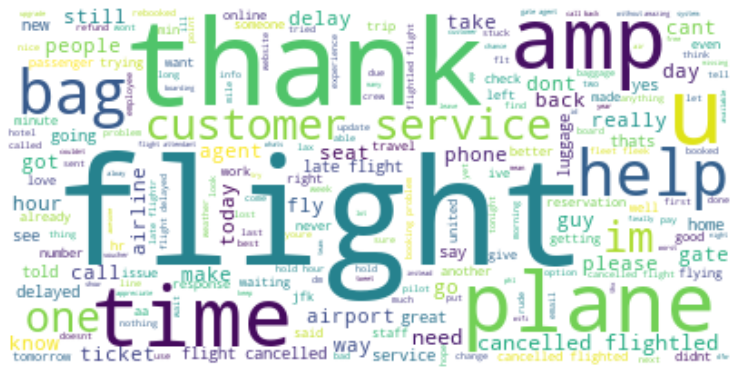

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off") # cerceveleri siliyor
plt.show()
# ozel htmller ile wordcloud bicimini degistirebiliyoruz